# Project: Wrangle and Analyze Data / Ayah Alhamdan   
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gath">Gather Data</a></li>
<li><a href="#as">Assess Data</a></li>
    <ul>
    <li><a href="#q">Quality Issues</a></li>
    <li><a href="#t">Tidiness Issues</a></li>
    </ul>
<li><a href="#clean">Clean Data</a></li>
<li><a href="#sav">Storing, Analyzing, and Visualizing</a></li>
<li><a href="#con">Conclusion</a></li>
</ul>

<a id='intro'></a>
## <font color='darkblue'>Introduction</font>  

The aim of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. This twitter account rates people's dogs with humorous comments. The account  received international media coverage and got popular on social media. To complete this project, the data needs to be gathered, assessed and cleaned to be able to analyze it and get some insights.

<a id='gath'></a>
## <font color='darkblue'>Gather Data</font>

1- Twitter archive file (downloaded from Udacity)    
2- Image predictions file (using the tsv file and the URL from Udacity)    
3- Twitter API & JSON    

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json

In [2]:
# 1- read twitter archive file
arch = pd.read_csv('twitter-archive-enhanced.csv')
arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
# 2- image predictions

url = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(url.content)

img = pd.read_csv('image-predictions.tsv', sep='\t' )
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


>**//note:** The third dataset was downloaded from Udacity since my twitter developer app is still pending and I don't have access to the twitter API code. The block of code below is copied from Udacity (does't have a valid output).

In [ ]:
# 3- query twitter API for JSON data in each tweet id
# The code below is from "twitter-api.py" provided in Udacity classroom

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
# read tweet-json.txt and append each tweet to tweets list

tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

# print first element to see available info
print(tweets[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [7]:
# save wanted columns to a dataframe

tweet_list =[]
for element in tweets:
        tweet_id = element['id']
        favorites = element['favorite_count']
        retweets = element['retweet_count']
        followers = element['user']['followers_count']
        if element['retweeted'] == False:
            retweeted_status = "Original tweet"
        else:
            retweeted_status = "Retweet"
        
            
        tweet_list.append({'id': str(tweet_id),
                             'favorites': int(favorites),
                             'retweets': int(retweets),
                             'followers': int(followers),
                             'retweeted_status': retweeted_status,
                            })
        
        tweet_df = pd.DataFrame(tweet_list, columns = ['id', 'favorites','retweets',
                                                       'followers', 'retweeted_status'])

In [8]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                  2354 non-null object
favorites           2354 non-null int64
retweets            2354 non-null int64
followers           2354 non-null int64
retweeted_status    2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [9]:
tweet_df.head(10)

,id,favorites,retweets,followers,retweeted_status
0,892420643555336193,39467,8853,3200889,Original tweet
1,892177421306343426,33819,6514,3200889,Original tweet
2,891815181378084864,25461,4328,3200889,Original tweet
3,891689557279858688,42908,8964,3200889,Original tweet
4,891327558926688256,41048,9774,3200889,Original tweet
5,891087950875897856,20562,3261,3200889,Original tweet
6,890971913173991426,12041,2158,3200889,Original tweet
7,890729181411237888,56848,16716,3200889,Original tweet
8,890609185150312448,28226,4429,3200889,Original tweet
9,890240255349198849,32467,7711,3200889,Original tweet


<a id='as'></a>
## <font color='darkblue'>Assess Data</font>

>Now let's look at the three dataframes we have:

In [10]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                  2354 non-null object
favorites           2354 non-null int64
retweets            2354 non-null int64
followers           2354 non-null int64
retweeted_status    2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


From the the previous outputs, we can see that the **id**s in the tables are different. To be able to merge these three tables, the columns have to have the same type and matching names. Also, it makes more sense to have **timestamp** as datetime type instead of object.     
Moreover, the twitter archive dataset (**arch**) had columns with missing values. These columns are:
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

In [13]:
arch.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


As we can see in the **name** column, there are invalid name inputs. Also, there are many colums that are not needed in the analysis.    
Furtheremore, we can see that the last 4 columns refer to one variable "dog stage".

In [14]:
arch[32:37]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
33,885984800019947520,NaN,NaN,2017-07-14 22:10:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion advised. This is Jimbo. He w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885984800...,12,10,Jimbo,None,None,None,None
34,885528943205470208,NaN,NaN,2017-07-13 15:58:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maisey. She fell asleep mid-excavation...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885528943...,13,10,Maisey,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None


There are records that have values in **'retweeted_status_user_id'** column other than NaN. Which means that this dataset has tweets that are not original. The repeated tweets will affect the analysis making it not accurate. These retweets have to be removed from the dataset. 

In [15]:
# check for duplicates
print("duplicates records in arch: {}".format(arch.duplicated().sum()))
print("duplicates of jpg_url in img: {}".format(img.jpg_url.duplicated().sum())) # repeated images
print("duplicates records in img: {}".format(img.duplicated().sum()))
print("duplicates records in tweet_df: {}".format(tweet_df.duplicated().sum()))

duplicates records in arch: 0
duplicates of jpg_url in img: 66
duplicates records in img: 0
duplicates records in tweet_df: 0


There are 66 duplicated of image url. We don't want repeated images, so these duplicates need to be dropped

> **Let's sum up all the issues found in the data assessment phase in points below:**

<a id='q'></a>
### <font color='darkgreen'>Quality Issues</font>


Quality issues are related with the data's content. Such as the completeness of the data, consistency, duplicates and so on. In this project, there are some quality issues that has to be handled.    
    
1. Remove retweeted tweets (only keep original ratings)
2. Delete columns that are not needed
3. Convert **timestamp** type to datetime instead of object
4. **source** column is difficult to read
5. Remove any duplicates
6. There are four different columns (**doggo**, **floofer**, **pupper**, and **puppo**) that refers to one variable **"dog_stage"**
7. Invalid names inputs in **Name** column (change it to 'None')
8. Remove the " _ " between words from the **images** dataset (to make it more readable)

<a id='t'></a>
### <font color='darkgreen'>Tidiness Issues</font>

Tidiness issues are the issues related to the structure of the data, there are two main things:   
    
1. Make **tweet_id** match in all tables to have it as primary key (to be able to combine the datasets)
2. Merge all datasets into one

<a id='clean'></a>
## <font color='darkblue'>Clean Data</font>

First, I will create copies of the dataframes so I can clean it and merge them into one to have a clean combined dataset.

In [16]:
# create copies of datasets to seperate the clean ones

clean_arch = arch.copy()
clean_img = img.copy()
clean_tweet_df = tweet_df.copy()

Now, I will go over the points in the **"Assessing Data"** section, fix all the required changes one by one.

##### <font color='purple'>1.</font> Define
The first issue that we have to keep in mind, is that the dataset contains all tweets including retweets. To have an accurate analysis, we need to remove the retweets from the dataset to remain with only original tweets (no repetition).

##### Code

In [17]:
# 1. Remove retweets
clean_arch = clean_arch[pd.isnull(clean_arch.retweeted_status_id)]

##### Test

In [18]:
# check that all retweets were removed
print("Number of retweets removed: {}".format(len(arch)-len(clean_arch)))

Number of retweets removed: 181


In [19]:
list(clean_arch)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### <font color='purple'>2.</font> Define
There are columns that are not needed in the analysis, these columns will be dropped.

##### Code

In [20]:
# 2. Delete columns that are not needed anymore

clean_arch = clean_arch.drop(['in_reply_to_status_id',
                              'in_reply_to_user_id',
                              'retweeted_status_id',
                              'retweeted_status_user_id',
                              'retweeted_status_timestamp',
                              'expanded_urls'], 1)

##### Test

In [21]:
# print columns
list(clean_arch)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### <font color='purple'>3.</font> Define
In the analysis, i will use the date to get some insights on how ratings change over time. To do that I need to convert the timestamp to datetime type to be able to extract the date later.

##### Code

In [22]:
# 3. Change timestamp type into datetime

from datetime import datetime,timedelta

clean_arch['timestamp'] = pd.to_datetime(clean_arch['timestamp'])

##### Test

In [23]:
clean_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


##### <font color='purple'>4.</font> Define
The **source** column in the twitter archive dataset is difficult to read, I will extract the 'href' only

##### Code

In [24]:
clean_arch['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [25]:
clean_arch['source'] = clean_arch['source'].str.replace('<a href="', '').str.replace('" rel=', '').str.replace('</a>', '').str.replace('>', '')
clean_arch['source'] = clean_arch['source'].str.split('"')


In [26]:
href = []
for i in clean_arch['source']:     
    href.append(i[0])


In [27]:
clean_arch['source'] = href

##### Test

In [28]:
clean_arch['source'][0]

'http://twitter.com/download/iphone'

##### <font color='purple'>5.</font> Define
Check if the data consists of any duplicates, and remove them if they exist.

##### Code

In [29]:
print("sum of jpg_url duplicates: {}".format(clean_img.jpg_url.duplicated().sum()))
clean_img.shape

sum of jpg_url duplicates: 66


(2075, 12)

In [30]:
# 5. drop duplicates
clean_img = clean_img.drop_duplicates(subset=['jpg_url'], keep='last')

##### Test

In [31]:
print("sum of jpg_url duplicates: {}".format(clean_img.jpg_url.duplicated().sum()))
clean_img.shape

sum of jpg_url duplicates: 0


(2009, 12)

##### <font color='purple'>6.</font> Define
There are four columns (**doggo**, **floofer**, **pupper**, and **puppo**) that should be melt into one column called **dog_stage**. It does not make sense to have many columns for one variable.
#####  Code

In [32]:
clean_arch.iloc[40:49, 7:]

,doggo,floofer,pupper,puppo
43,doggo,None,None,None
44,None,None,None,None
45,None,None,None,None
46,None,floofer,None,None
47,None,None,None,None
48,None,None,None,None
49,None,None,pupper,None
50,None,None,None,None
51,None,None,None,None


In [33]:
clean_arch['dog_stage'] = clean_arch['doggo'] + clean_arch['floofer'] + clean_arch['pupper'] + clean_arch['puppo']
clean_arch['dog_stage'][:10]

0     NoneNoneNoneNone
1     NoneNoneNoneNone
2     NoneNoneNoneNone
3     NoneNoneNoneNone
4     NoneNoneNoneNone
5     NoneNoneNoneNone
6     NoneNoneNoneNone
7     NoneNoneNoneNone
8     NoneNoneNoneNone
9    doggoNoneNoneNone
Name: dog_stage, dtype: object

In [34]:
clean_arch['dog_stage'].replace("NoneNoneNoneNone","None ", inplace=True)
clean_arch['dog_stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
clean_arch['dog_stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
clean_arch['dog_stage'].replace("NoneNonepupperNone","pupper", inplace=True)
clean_arch['dog_stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

In [35]:
clean_arch = clean_arch.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [36]:
clean_arch.iloc[40:49, 7:]

,dog_stage
43,doggo
44,None
45,None
46,floofer
47,None
48,None
49,pupper
50,None
51,None


##### <font color='purple'>7.</font> Define
There are invalid names in the dataset, these names should be replaced to **None**.
##### Code

In [37]:
# 7. Fix invalid names in Name column 

# all names start with a capital letter, find the ones that don't:
invalid_name = []
for name in clean_arch['name']:
    if name.islower():
        invalid_name.append(name)

# list of invalid name inputs
invalid_name = list(set(invalid_name))
print(len(invalid_name))
print(invalid_name)

25
['such', 'one', 'actually', 'light', 'the', 'space', 'very', 'quite', 'an', 'his', 'mad', 'old', 'getting', 'life', 'all', 'not', 'a', 'this', 'officially', 'infuriating', 'unacceptable', 'incredibly', 'just', 'my', 'by']


In [38]:
# Change invalid name inputs to 'None'

for name in clean_arch['name']:
    if name in invalid_name:
        clean_arch['name'].replace(name, 'None', inplace=True)

##### Test

In [39]:
# check
for name in clean_arch['name']:
    if name.islower():
        print(name)

##### <font color='purple'>8.</font> Define
To make the dog types more readable, I will remove the '_' betweet the words.
##### Code

In [40]:
# 8. Remove the " _ " between words from the images dataset

clean_img['p1'] = clean_img['p1'].str.replace('_', ' ')
clean_img['p2'] = clean_img['p2'].str.replace('_', ' ')
clean_img['p3'] = clean_img['p3'].str.replace('_', ' ')

##### Test

In [41]:
# check
clean_img.p1[:3]

0    Welsh springer spaniel
1                   redbone
2           German shepherd
Name: p1, dtype: object

In [42]:
clean_img.p2[:3]

0                collie
1    miniature pinscher
2              malinois
Name: p2, dtype: object

In [43]:
clean_img.p3[:3]

0      Shetland sheepdog
1    Rhodesian ridgeback
2             bloodhound
Name: p3, dtype: object

##### <font color='purple'>9.</font> Define
To be able to merge all three darasets, the primary keys must match. To do that, the **id**s have to have the same name and type.
##### Code

In [44]:
# 9. Match primary keys

clean_arch['tweet_id'] = clean_arch['tweet_id'].astype(str)
clean_img['tweet_id'] = clean_img['tweet_id'].astype(str)


clean_tweet_df.rename(columns={'id':'tweet_id'}, inplace=True)

##### Test

In [45]:
clean_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 232.9+ KB


In [46]:
clean_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [47]:
clean_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id            2354 non-null object
favorites           2354 non-null int64
retweets            2354 non-null int64
followers           2354 non-null int64
retweeted_status    2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


##### <font color='purple'>10.</font> Define
To perform analysis using all three tables, the datasets have to be merged into one.
##### Code

In [48]:
# 10. Merge datasets

# combine clean_arch with clean_img
df1 = pd.merge(clean_arch, clean_img, how = 'left', on = ['tweet_id'])

# combine df1 with clean_tweet_df
df = pd.merge(df1, clean_tweet_df, how = 'left', on = ['tweet_id'])

##### Test

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
jpg_url               1928 non-null object
img_num               1928 non-null float64
p1                    1928 non-null object
p1_conf               1928 non-null float64
p1_dog                1928 non-null object
p2                    1928 non-null object
p2_conf               1928 non-null float64
p2_dog                1928 non-null object
p3                    1928 non-null object
p3_conf               1928 non-null float64
p3_dog                1928 non-null object
favorites             2175 non-null int64
retweets              21

Now I will drop all unnecessary columns, to have the final dataset clean and ready to be stored.

In [50]:
df = df.drop(['img_num', 'p1_conf', 'p1_dog', 'p2_conf', 'p2_dog','p3_conf', 'p3_dog'], axis=1)

In [51]:
df.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p2,p3,favorites,retweets,followers,retweeted_status
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,39467,8853,3200889,Original tweet
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,papillon,33819,6514,3200889,Original tweet
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,malamute,kelpie,25461,4328,3200889,Original tweet


<a id='sav'></a>
## <font color='darkblue'>Storing, Analyzing, and Visualizing</font>

Store the clean combined dataframe in a csv file

In [52]:
# Store final dataframe
df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

After storing the dataset in a seperate file, we will look for some insights:    
**1) What is the most common dog type from the first prediction?    
2)  What is the relationship between the number of retweets and favorites?    
3)  How is the rating changing over time?**

### Descriptive statistical analysis:

In [53]:
df.describe()

,rating_numerator,rating_denominator,favorites,retweets,followers
count,2175.000000,2175.000000,2175.000000,2175.000000,2.175000e+03
mean,13.215172,10.492874,8746.022989,2757.987126,3.200945e+06
std,47.725696,7.019084,12052.503836,4646.599662,4.417845e+01
min,0.000000,0.000000,52.000000,0.000000,3.200799e+06
25%,10.000000,10.000000,1911.500000,608.000000,3.200901e+06
50%,11.000000,10.000000,4042.000000,1341.000000,3.200947e+06
75%,12.000000,10.000000,11107.000000,3220.000000,3.201001e+06
max,1776.000000,170.000000,132810.000000,79515.000000,3.201018e+06


* The mean rating is **13.2/10** (The maximum value 1776/10 is an outlier)
* The highest number of retweets is **79,515** with a mean of **2,758**
* The highest number of favorites is **132,810** with a mean of **8,746**

In [54]:
# count each dog type from p1 (highest prediction)

type_count = df['p1'].value_counts()
type_count

golden retriever             128
Labrador retriever            90
Pembroke                      87
Chihuahua                     75
pug                           52
chow                          38
Pomeranian                    38
Samoyed                       37
toy poodle                    37
malamute                      28
French bulldog                26
cocker spaniel                24
Chesapeake Bay retriever      23
miniature pinscher            21
German shepherd               20
seat belt                     20
Siberian husky                20
teddy                         18
Maltese dog                   18
Shetland sheepdog             18
Eskimo dog                    18
Staffordshire bullterrier     18
Shih-Tzu                      17
Rottweiler                    17
Italian greyhound             16
kuvasz                        16
beagle                        16
Lakeland terrier              15
web site                      15
Cardigan                      15
          

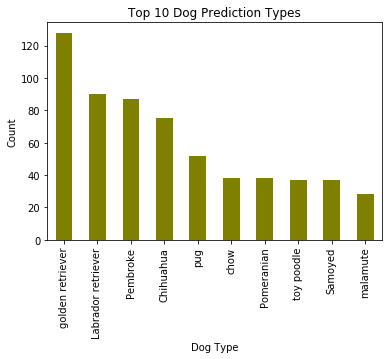

In [55]:
# use a bar chart to visualize the top common dog types

top10 = df.groupby('p1').filter(lambda x: len(x) > 27)
top10['p1'].value_counts().plot(kind = 'bar',color='olive')
plt.title('Top 10 Dog Prediction Types')
plt.xlabel('Dog Type')
plt.ylabel('Count');

>### Insight #1:
The most common dog type is the **Golden retriever**.

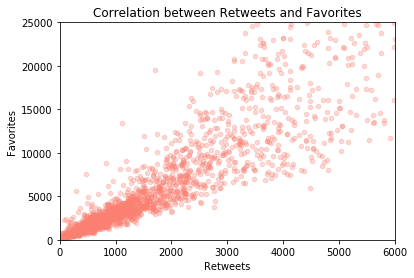

In [56]:
# plot retweet and favorite count (with a limit to have a clear visualization)

df.plot(kind='scatter',x='retweets',y='favorites',ylim=[0,25000],xlim=[0,6000], alpha = 0.3, color = 'salmon')
plt.title('Correlation between Retweets and Favorites');
plt.xlabel('Retweets')
plt.ylabel('Favorites');

In [57]:
df[['retweets','favorites']].corr()

,retweets,favorites
retweets,1.000000,0.911732
favorites,0.911732,1.000000


>### Insight #2:
As shown in the graph above, there is a **strong positive correlation (r = 0.91)** between the number of retweets and favorites. The more retweets a tweet gets, the higher number of favorites.

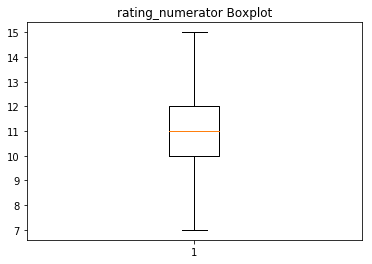

In [58]:
# rating_numerator range without outliers
rates = df["rating_numerator"]
plt.boxplot(rates,showfliers=False)
plt.title('rating_numerator Boxplot');

In [59]:
# create date column
df['date'] = df['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))

In [60]:
# extract rate and date in a new df

rd = df[['rating_numerator', 'date']].copy() # get the two columns needed

rd['date'] = pd.to_datetime(rd['date']) # convert type to datetime

rd.sort_values(by=['date'],inplace=True) # sort values by year

rd.head()

,rating_numerator,date
2174,8,2015-11-15
2173,7,2015-11-15
2172,9,2015-11-15
2171,6,2015-11-16
2147,9,2015-11-16


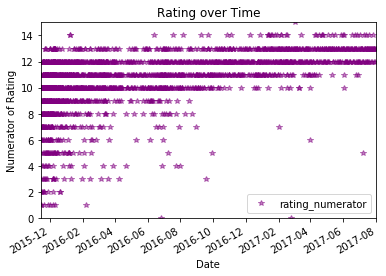

In [61]:
# take the range of y-axis from the boxplot (numerators from 0 to 15)

rd.plot(x = "date", y ='rating_numerator', ylim=[0,15], style = '*', alpha = .5, color='purple')
plt.title('Rating over Time')
plt.xlabel('Date')
plt.ylabel('Numerator of Rating');

>### Insight #3:
As we can see from the plot above, **the ratings are getting higher over time**.

<a id='con'></a>
## <font color='darkblue'>Conclusion</font>



WeRateDogs Twitter account rates people's dogs with humorous comments. Over the years, this account became very popular on social media. People enjoyed looking at pictures of dogs and giving them ratings. Ratings usually have numerators higher than 10, and this was the special thing about it. Dogs got ratings higher and higher over time. There are a lot of dog images that gets tweeted everyday, which contain many types of dogs. It appears that the most common dog type is the Golden retriever. These insights apply to this dataset which was collected between 2015 and 2018.

### References:

Udacity Classroom     
Stack overflow    
https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/    
https://developer.rhino3d.com/guides/rhinopython/python-xml-json/    
https://www.geeksforgeeks.org/type-conversion-python/    
https://timestamp.online/article/how-to-convert-timestamp-to-datetime-in-python    
https://www.tutorialspoint.com/python/string_replace.htm    
https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html    
https://matplotlib.org/users/pyplot_tutorial.html    